In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("C:/Users/Yash/Desktop/covid_19_data.csv")

In [5]:
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [21]:
df.isna().sum()

SNo                    0
ObservationDate        0
Province/State     78103
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [22]:
for i in df.columns:
    if df[i].dtypes==object:
        df[i]=df[i].fillna(df[i].mode()[0])
    else:
        df[i]=df[i].fillna(df[i].mean())

In [23]:
df.isna().sum()

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [25]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

1.What is the total number of confirmed cases 
worldwide?

In [13]:
df['Confirmed'].sum()

26252051758.0

2.How many deaths have been reported globally?


In [14]:
df['Deaths'].sum()

624013017.0

What is the total number of recovered cases 
worldwide?

In [15]:
df['Recovered'].sum()

15450237912.0

3.How many countries/regions are represented in the 
dataset?

In [38]:
df['Country/Region'].unique()


array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'China', 'Kiribati', 'Singapore',
       'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico',
       'Brazil', 'Colombia', 'France', 'Nepal', 'Canada', 'Cambodia',
       'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland',
       'United Arab Emirates', 'India', 'Italy', 'UK', 'Russia', 'Sweden',
       'Spain', 'Belgium', 'Others', 'Egypt', 'Iran', 'Israel', 'Lebanon',
       'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Austria',
       'Algeria', 'Croatia', 'Switzerland', 'Pakistan', 'Georgia',
       'Greece', 'North Macedonia', 'Norway', 'Romania', 'Denmark',
       'Estonia', 'Netherlands', 'San Marino', ' Azerbaijan', 'Belarus',
       'Iceland', 'Lithuania', 'New Zealand', 'Nigeria', 'North Ireland',
       'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador',
       'Azerbaijan', 'Czech Republic', 'Armenia', 'Dominican Republic',
       'Indonesia', 'Portugal

5.What is the trend of confirmed cases over time 
globally?

<Axes: xlabel='ObservationDate'>

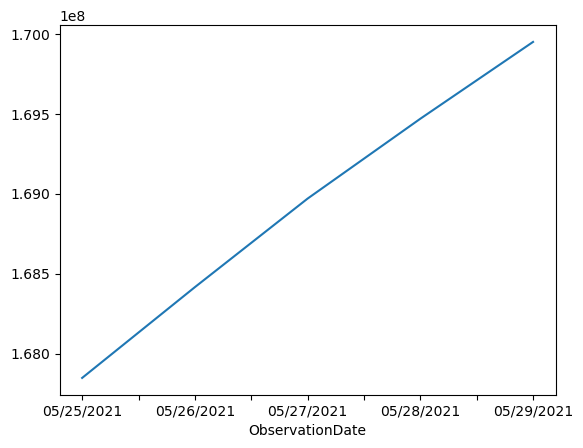

In [62]:
df.groupby('ObservationDate')['Confirmed'].sum().sort_values().tail(5).plot(kind='line')

6.Which province/state has reported the highest 
number of confirmed cases?

<Axes: xlabel='Province/State'>

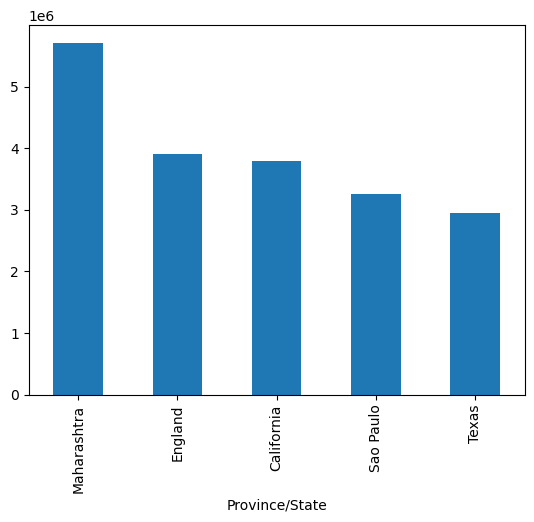

In [17]:
df.groupby('Province/State')['Confirmed'].max().sort_values(ascending=False).head().plot(kind='bar')

7.Which country/region has the highest number of 
deaths?

<Axes: xlabel='Country/Region'>

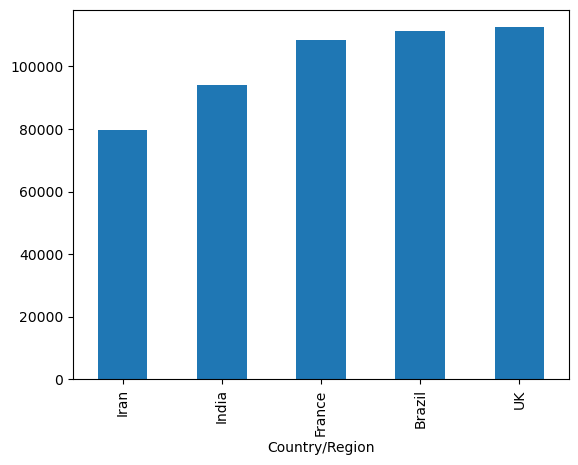

In [73]:
df.groupby('Country/Region')['Deaths'].max().sort_values().tail(5).plot(kind='bar')

8.How does the number of confirmed cases vary across 
different provinces/states?

<Axes: xlabel='Province/State'>

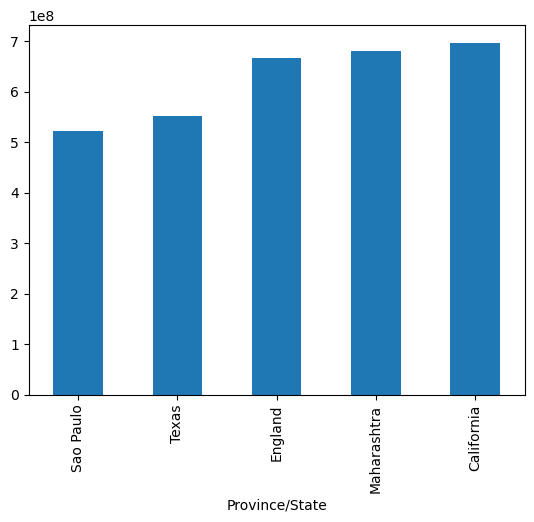

In [88]:
df.groupby('Province/State')['Confirmed'].sum().sort_values().tail(5).plot(kind='bar')

9.What is the trend of deaths over time globally?


<Axes: xlabel='ObservationDate'>

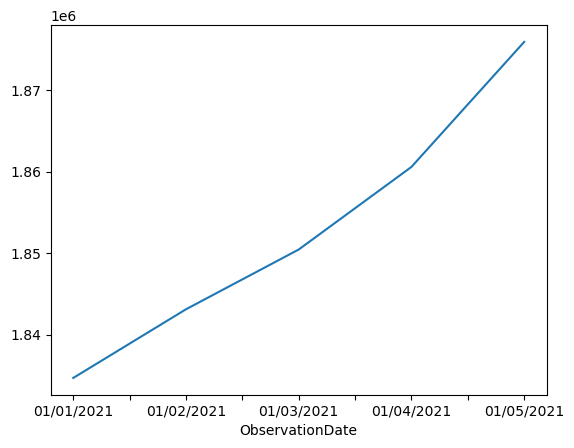

In [98]:
df.groupby('ObservationDate')['Deaths'].sum().head(5).plot(kind='line')

10.Which country/region has the highest number of 
recovered cases?

<Axes: ylabel='Recovered'>

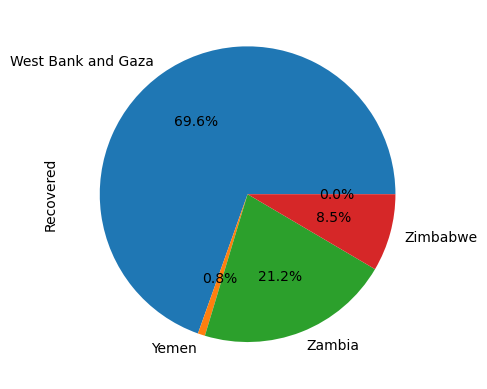

In [18]:
df.groupby('Country/Region')['Recovered'].max().tail().plot(kind='pie',autopct='%1.1f%%')

11.How does the number of recovered cases vary 
across different countries/regions?

<Axes: ylabel='Country/Region'>

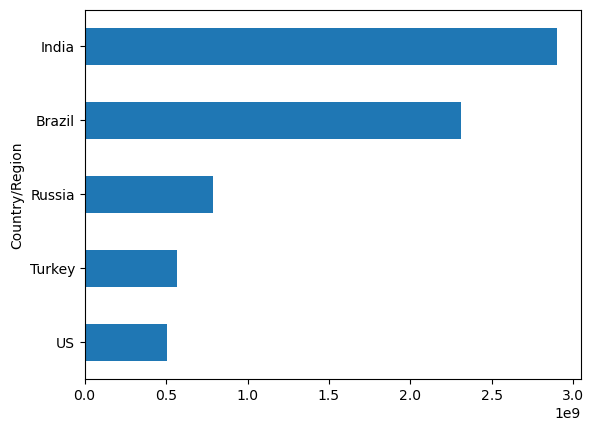

In [35]:
df.groupby('Country/Region')['Recovered'].sum().sort_values().tail().plot(kind='barh')

12.What is the distribution of confirmed cases by 
country/region?


<Axes: xlabel='Country/Region'>

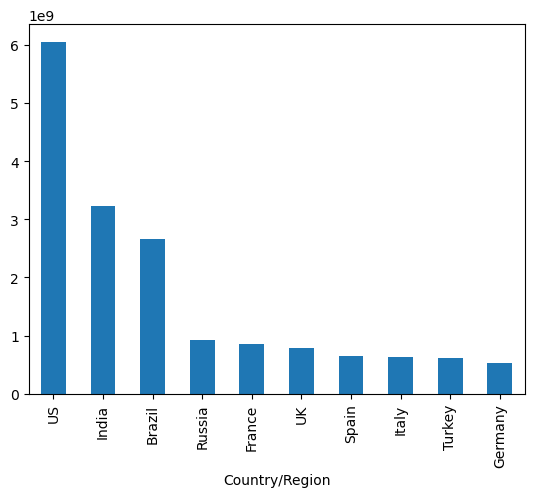

In [49]:
df.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

13.Is there a correlation between the number of 
confirmed cases and deaths?

<Axes: >

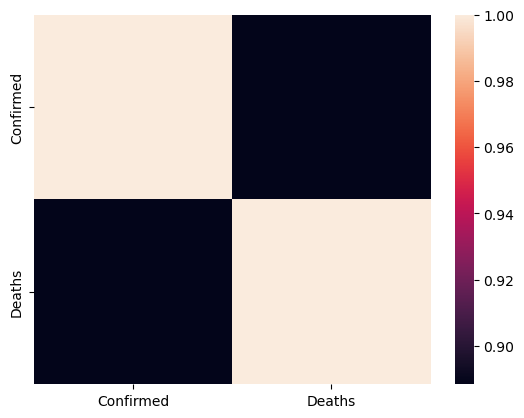

In [52]:
sns.heatmap(df[['Confirmed','Deaths']].corr())

14.Is there a correlation between the number of 
confirmed cases and recovered cases?


<Axes: >

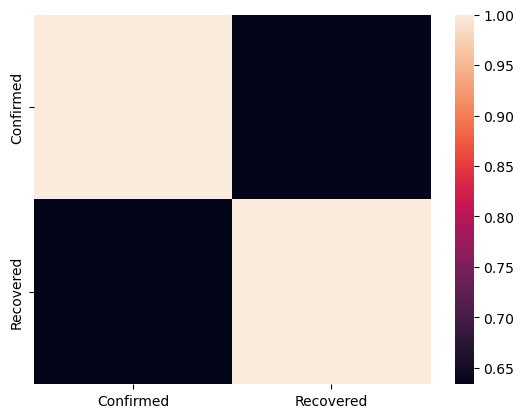

In [53]:
sns.heatmap(df[['Confirmed','Recovered']].corr())

15.How does the mortality rate vary across different 
countries/regions?


<Axes: ylabel='Country/Region'>

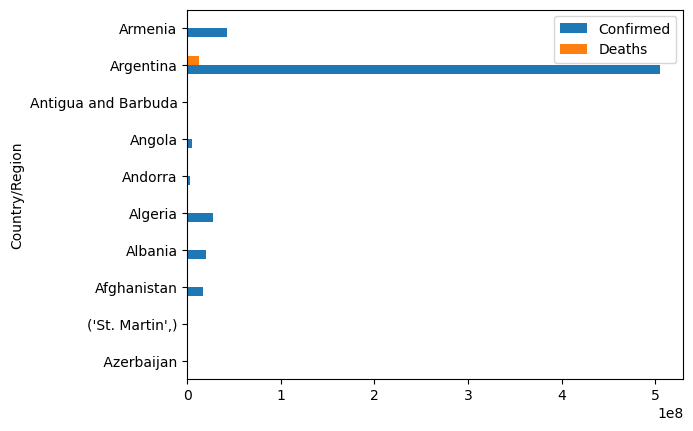

In [58]:
df.groupby('Country/Region')[['Confirmed','Deaths']].sum().head(10).plot(kind='barh')

16.How does the recovery rate vary across different 
countries/regions?


<Axes: ylabel='Country/Region'>

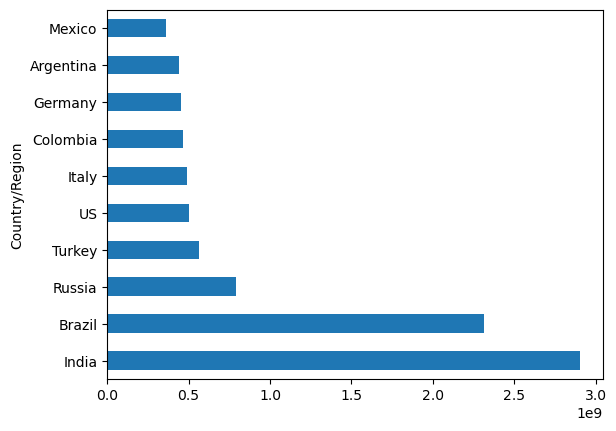

In [70]:
df.groupby('Country/Region')['Recovered'].sum().sort_values(ascending=False).head(10).plot(kind='barh')

17.What is the trend of new confirmed cases over time 
globally?

<Axes: xlabel='ObservationDate'>

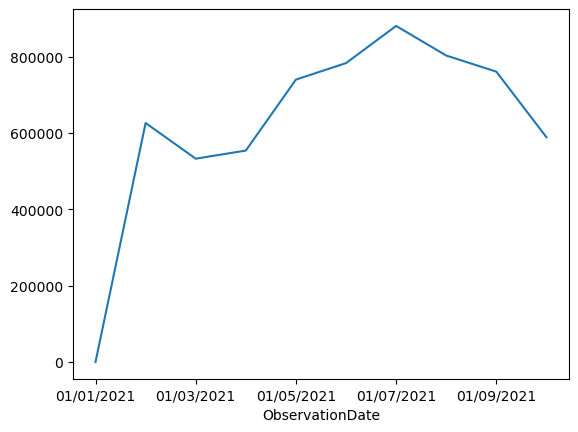

In [88]:
df.groupby('ObservationDate').sum()['Confirmed'].diff().fillna(0).head(10).plot(kind='line')

18.How does the fatality rate vary across different 
provinces/states?

<Axes: xlabel='Province/State'>

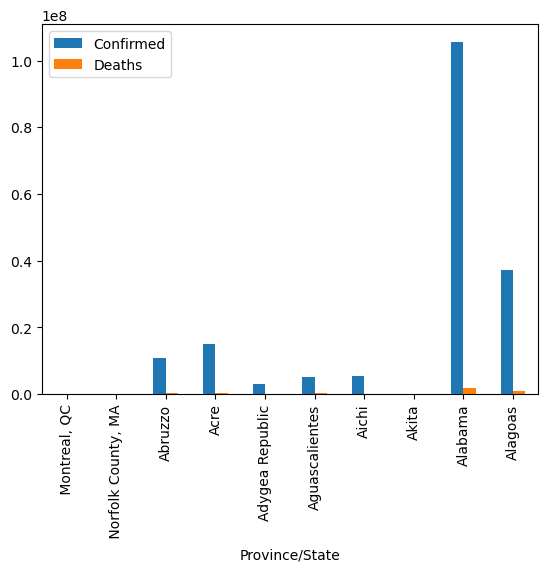

In [104]:
df.groupby('Province/State')[['Confirmed','Deaths']].sum().head(10).plot(kind='bar')

19.How does the recovery rate vary across different 
provinces/states?


<Axes: ylabel='Province/State'>

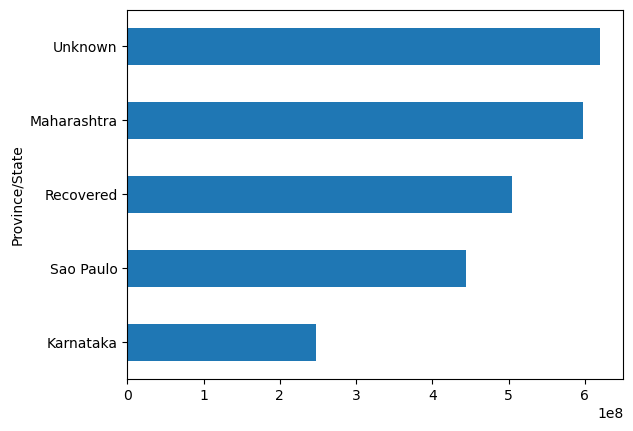

In [16]:
df.groupby('Province/State')['Recovered'].sum().sort_values().tail().plot(kind='barh')

20.What is the trend of active cases over time globally?

In [6]:
df['Active']=df['Confirmed']-df['Recovered']-df['Deaths']	

<Axes: xlabel='ObservationDate'>

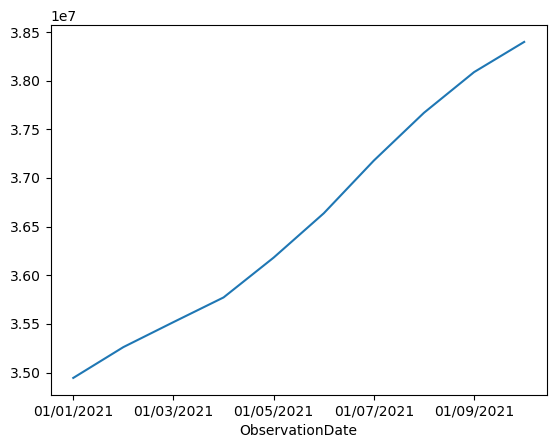

In [15]:
df.groupby('ObservationDate')['Active'].sum().head(10).plot(kind='line')